In [27]:
import xgboost as xgb
import pandas as pd
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

/home/jarvis/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [8]:
# x_train = pd.read_csv('../processed_data/pre_x_train.csv')
# x_test = pd.read_csv('../processed_data/pre_x_test.csv')
x_train = pd.read_csv('../processed_data/new_train_added_10_all.csv')
x_test = pd.read_csv('../processed_data/new_test_added_10_all.csv')
y_train = pd.read_csv('../processed_data/y_train.csv')
x_test_id = pd.read_csv('../raw_data/test.csv',usecols=['ID'])

In [24]:
params = {
    'eta': 0.02,
    'max_depth': 4,
    'subsample': 0.93,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': 100.0, # base prediction = mean(target)
    'silent': 1
}
d_train = xgb.DMatrix(x_train,y_train)
watchlist = [(d_train, 'train')]

d_test = xgb.DMatrix(x_test)

params = {}
params['objective'] = 'reg:linear'
params['eval_metric'] = 'rmse'
params['eta'] = 0.02
params['max_depth'] = 3
params['base_score'] = y_train['y'].mean()
d_train = xgb.DMatrix(x_train,y_train)
watchlist = [(d_train, 'train')]

d_test = xgb.DMatrix(x_test)

In [25]:
bst = xgb.train(params, d_train ,300, watchlist,early_stopping_rounds=50, verbose_eval=10)

[0]	train-rmse:12.5483
Will train until train-rmse hasn't improved in 50 rounds.
[10]	train-rmse:11.2849
[20]	train-rmse:10.3346
[30]	train-rmse:9.64023
[40]	train-rmse:9.12667
[50]	train-rmse:8.73604
[60]	train-rmse:8.45434
[70]	train-rmse:8.24515
[80]	train-rmse:8.0823
[90]	train-rmse:7.95443
[100]	train-rmse:7.8444
[110]	train-rmse:7.76373
[120]	train-rmse:7.67483
[130]	train-rmse:7.61085
[140]	train-rmse:7.54222
[150]	train-rmse:7.475
[160]	train-rmse:7.4049
[170]	train-rmse:7.35539
[180]	train-rmse:7.31094
[190]	train-rmse:7.26813
[200]	train-rmse:7.23181
[210]	train-rmse:7.19732
[220]	train-rmse:7.16522
[230]	train-rmse:7.13638
[240]	train-rmse:7.10544
[250]	train-rmse:7.07504
[260]	train-rmse:7.04626
[270]	train-rmse:7.01711
[280]	train-rmse:6.991
[290]	train-rmse:6.96214
[299]	train-rmse:6.93699


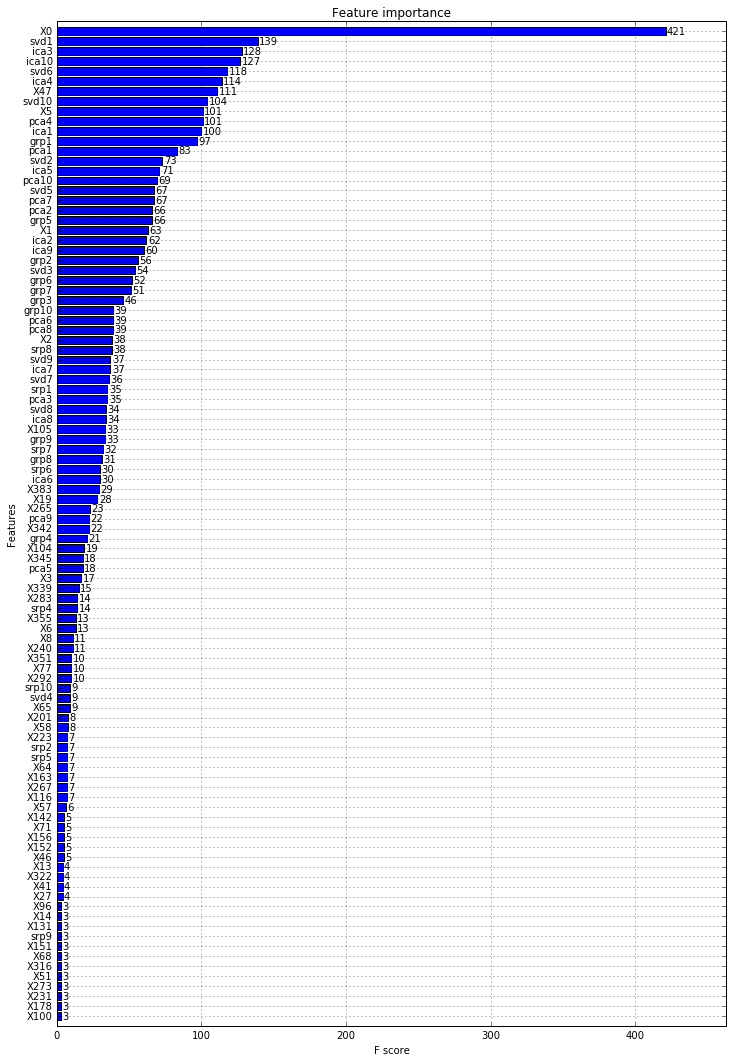

In [29]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(bst, max_num_features=100, height=0.8, ax=ax)
plt.show()

In [21]:
y_test = bst.predict(d_test)
sub = pd.DataFrame()
sub['ID'] = x_test_id['ID']
sub['y'] = y_test
sub.to_csv('../output/dimred5.csv', index=False)